**DATASET DESCRIPTION:**The dataset represents a comprehensive simulation of student interactions on an educational technology platform, capturing detailed information from 14,843 students across 23 different features. It provides insights into student engagement, subscription behaviors, academic performance, and platform interactions, making it a valuable resource for understanding digital learning dynamics. The data includes a mix of demographic, engagement, and performance metrics that can be used for predictive modeling, customer segmentation, and strategic decision-making in educational technology. Completely synthetic and anonymized, the dataset offers researchers and analysts a rich, realistic view of how students interact with online learning platforms, without containing any personal identifiable information.

**QUESTION:**

**What are the key factors influencing Renewal status in the dataset?**

**DATASET LINK:** https://www.kaggle.com/datasets/jessekeats/tutoring-website-data/data

**CHATGPT LINK:**https://chatgpt.com/share/675b0f99-bf28-8008-aed1-4bc1a62d497a

#Exploratory Data Analysis (EDA)

LOAD THE DATA AND PRINT FIRST FEW ROWS

In [ ]:

import pandas as pd

file_path = '/content/tutoring_data.csv'

# Load only the first few rows of the dataset to avoid processing timeouts
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data


,User_ID,Age_in_Months,Gender,Location,Grade,Logins_per_Month,Days_Completed_Activity,Exercises_Started,Total_Time_Spent_in_Minutes,Course_Name,...,Recommendation_Likelihood,Exercises_Completed,Points_Earned,Subscription_Tier,Subscription_Cost,Subscription_Length_in_Months,Renewal_Status,Tutoring,Referrals,Academic_Grade
0,654b113d-4ce4-41a9-a8f4-7f1419419230,156,Other,"Smithchester, VA",8th Grade,6,5,9.784359,107.889381,Chemistry,...,3,7,1910.292936,Free,0.00,4,Yes,Yes,0,D
1,2a044973-1d29-4b2f-83f6-c488290140bb,202,Female,"Beckside, FL",10th Grade,6,6,9.000000,198.865171,Web Development,...,4,9,1698.767255,Free,0.00,1,Yes,No,0,F
2,d84bb18b-bd77-4be9-98bb-a0993b95af75,173,Other,"New Deborahborough, SD",9th Grade,7,4,12.159345,232.639784,Geometry,...,4,10,1860.295769,Premium,9.99,13,Yes,No,0,D
3,411cebf6-18cc-4846-89c7-f3f7bcaede01,199,Female,"West Stephanie, KY",12th Grade,17,17,28.000000,506.644691,Pre-Calculus,...,3,28,4465.824908,Basic,5.99,11,Yes,No,1,F
4,e4ada708-10b6-4fcd-ac08-a83152658751,148,Female,"West Roberthaven, LA",7th Grade,10,8,15.458939,305.275706,Java Programming,...,4,17,2499.211664,Premium,9.99,12,Yes,No,0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14838,b1eb5f54-5f16-4232-a120-7ab791921591,214,Male,"Ramseyborough, PW",12th Grade,13,14,31.154402,710.385561,Environmental Science,...,5,23,3240.208453,Free,0.00,1,Yes,Yes,0,D
14839,a441aab6-fc84-4c46-9c63-e06c9455cca1,127,Male,"Glennport, MP",6th Grade,7,7,20.724994,367.768263,Web Development,...,3,12,2173.623984,Basic,5.99,7,Yes,Yes,0,C
14840,46336715-24a9-4982-ae5e-42015a2b033e,204,Other,"Port Timothychester, NV",10th Grade,13,13,23.000000,505.984111,Pre-Calculus,...,4,23,3430.860009,Free,0.00,1,Yes,No,1,D
14841,b6780162-5033-4ab2-8c78-6bce7446b871,182,Male,"Port Brianview, OH",10th Grade,7,9,20.679306,409.490339,Calculus,...,4,13,2486.069547,Basic,5.99,5,Yes,No,0,F


OVERVIEW DESCRIPTION

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14843 entries, 0 to 14842
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User_ID                        14843 non-null  object 
 1   Age_in_Months                  14843 non-null  int64  
 2   Gender                         14843 non-null  object 
 3   Location                       14843 non-null  object 
 4   Grade                          14843 non-null  object 
 5   Logins_per_Month               14843 non-null  int64  
 6   Days_Completed_Activity        14843 non-null  int64  
 7   Exercises_Started              14843 non-null  float64
 8   Total_Time_Spent_in_Minutes    14843 non-null  float64
 9   Course_Name                    14843 non-null  object 
 10  Course_Category                14843 non-null  object 
 11  Completion_Rate                14843 non-null  float64
 12  Average_Score                  14843 non-null 

there are several columns that are on words well map categorical variables accordingly

#Preprocessing

drop USER ID and LOCATION as it wont be useful for our analysis  

In [ ]:
# Dropping irrelevant columns for analysis
data = data.drop(columns=['User_ID', 'Location'], axis=1)

# Displaying the columns of the cleaned dataset to confirm changes
data.columns


Index(['Age_in_Months', 'Gender', 'Grade', 'Logins_per_Month',
       'Days_Completed_Activity', 'Exercises_Started',
       'Total_Time_Spent_in_Minutes', 'Course_Name', 'Course_Category',
       'Completion_Rate', 'Average_Score', 'Course_Rating',
       'Recommendation_Likelihood', 'Exercises_Completed', 'Points_Earned',
       'Subscription_Tier', 'Subscription_Cost',
       'Subscription_Length_in_Months', 'Renewal_Status', 'Tutoring',
       'Referrals', 'Academic_Grade'],
      dtype='object')

Now let us Drop the column Subscription_Cost and Days_Completed_Activity

In [ ]:
data = data.drop(columns=['Subscription_Cost','Days_Completed_Activity'], axis=1)
data.columns

Index(['Age_in_Months', 'Gender', 'Grade', 'Logins_per_Month',
       'Exercises_Started', 'Total_Time_Spent_in_Minutes', 'Course_Name',
       'Course_Category', 'Completion_Rate', 'Average_Score', 'Course_Rating',
       'Recommendation_Likelihood', 'Exercises_Completed', 'Points_Earned',
       'Subscription_Tier', 'Subscription_Length_in_Months', 'Renewal_Status',
       'Tutoring', 'Referrals', 'Academic_Grade'],
      dtype='object')

Since we have course category we can map them so the course name wont be useful because those courses only were mapped as categories so let us drop course name as well

Dropping the 'Course_Name' column as 'Course_Category' provides sufficient information

In [ ]:
# Dropping the 'Course_Name' column as 'Course_Category' provides sufficient information
data = data.drop(columns=['Course_Name'], axis=1)

# Displaying the updated column list to confirm
data.columns


Index(['Age_in_Months', 'Gender', 'Grade', 'Logins_per_Month',
       'Exercises_Started', 'Total_Time_Spent_in_Minutes', 'Course_Category',
       'Completion_Rate', 'Average_Score', 'Course_Rating',
       'Recommendation_Likelihood', 'Exercises_Completed', 'Points_Earned',
       'Subscription_Tier', 'Subscription_Length_in_Months', 'Renewal_Status',
       'Tutoring', 'Referrals', 'Academic_Grade'],
      dtype='object')

**MAPPING CATEGORICAL VARIABLES**

MAP COURSE CATEGORY

In [ ]:
# Mapping Course_Category to numeric values
category_mapping = {'Science': 0, 'Programming': 1, 'Math': 2}
data['Course_Category'] = data['Course_Category'].map(category_mapping)

# Checking the unique values to confirm the mapping
data['Course_Category'].unique()


array([0, 1, 2])

MAP GENDER

In [ ]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
data['Gender'].unique()

array([2, 1, 0])

TUTORING MAPPING

In [ ]:
# Map 'Tutoring' column values: Yes -> 1, No -> 0
data['Tutoring'] = data['Tutoring'].map({'Yes': 1, 'No': 0})

# Display unique values in the 'Tutoring' column to confirm mapping
data['Tutoring'].unique()


array([1, 0])

Subscription Tier Mapping

In [ ]:
# Map 'Subscription_Tier' column values: Free -> 0, Basic -> 1, Premium -> 2
data['Subscription_Tier'] = data['Subscription_Tier'].map({'Free': 0, 'Basic': 1, 'Premium': 2})

# Display unique values in the 'Subscription_Tier' column to confirm mapping
data['Subscription_Tier'].unique()


array([0, 2, 1])

Grade Mapping

In [ ]:
# Extract the numeric part of the 'Grade' column and convert it to an integer
data['Grade'] = data['Grade'].str.extract('(\d+)').astype(int)

# Display unique values in the 'Grade' column to confirm mapping
data['Grade'].unique()


array([ 8, 10,  9, 12,  7,  6, 11])

Renewal Status Mapping(TARGET)

In [ ]:
# Map 'Renewal_Status' column values: Yes -> 1, No -> 0
data['Renewal_Status'] = data['Renewal_Status'].map({'Yes': 1, 'No': 0})

# Display unique values in the 'Renewal_Status' column to confirm mapping
data['Renewal_Status'].unique()


array([1, 0])

Academic Grade Mapping

In [ ]:
# Map 'Academic_Grade' column values to numeric equivalents
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
data['Academic_Grade'] = data['Academic_Grade'].map(grade_mapping)

# Display unique values in the 'Academic_Grade' column to confirm mapping
data['Academic_Grade'].unique()


array([1, 0, 3, 2])

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14843 entries, 0 to 14842
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age_in_Months                  14843 non-null  int64  
 1   Gender                         14843 non-null  int64  
 2   Grade                          14843 non-null  int64  
 3   Logins_per_Month               14843 non-null  int64  
 4   Exercises_Started              14843 non-null  float64
 5   Total_Time_Spent_in_Minutes    14843 non-null  float64
 6   Course_Category                14843 non-null  int64  
 7   Completion_Rate                14843 non-null  float64
 8   Average_Score                  14843 non-null  float64
 9   Course_Rating                  14843 non-null  int64  
 10  Recommendation_Likelihood      14843 non-null  int64  
 11  Exercises_Completed            14843 non-null  int64  
 12  Points_Earned                  14843 non-null 

now all columns are converted into numeric values lets proceed further

**check for missing values**

In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()

# Displaying the columns with missing values
print(missing_values[missing_values > 0])


Series([], dtype: int64)


there are no missing values

**normalize the numeric features**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns= [
    'Age_in_Months', 'Logins_per_Month',
    'Exercises_Started', 'Total_Time_Spent_in_Minutes', 'Completion_Rate',
    'Average_Score', 'Recommendation_Likelihood',
    'Exercises_Completed', 'Points_Earned',
    'Subscription_Length_in_Months', 'Referrals','Course_Rating'
]

# Confirm the scaling only affects these columns
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

 **handle outliers**

In [ ]:
# List of columns to exclude from outlier capping since they hold some important insights
exclude_columns = [
    'Points_Earned', 'Total_Time_Spent_in_Minutes',
    'Exercises_Started', 'Completion_Rate', 'Average_Score',
    'Renewal_Status', 'Gender', 'Subscription_Tier', 'Tutoring','Course_Rating'
]

# Selecting numeric columns to process
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
columns_to_cap = [col for col in numeric_columns if col not in exclude_columns]

# Applying IQR-based capping
for col in columns_to_cap:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

# Checking the dataset after capping
print(data.describe())


       Age_in_Months        Gender         Grade  Logins_per_Month  \
count   14843.000000  14843.000000  14843.000000      14843.000000   
mean        0.500698      1.014283      9.005120          0.401291   
std         0.249330      0.819721      1.983282          0.145017   
min         0.000000      0.000000      6.000000          0.045455   
25%         0.294118      0.000000      7.000000          0.318182   
50%         0.500000      1.000000      9.000000          0.409091   
75%         0.705882      2.000000     11.000000          0.500000   
max         1.000000      2.000000     12.000000          0.772727   

       Exercises_Started  Total_Time_Spent_in_Minutes  Course_Category  \
count       14843.000000                 14843.000000     14843.000000   
mean            0.408955                     0.289401         1.000337   
std             0.146170                     0.162664         0.815189   
min             0.000000                     0.000000         0.000000   

view target variable distribution

In [ ]:
# Checking the distribution of the target variable
target_distribution = data['Renewal_Status'].value_counts(normalize=True) * 100

# Displaying the distribution
print("Target Variable Distribution (%):")
print(target_distribution)


Target Variable Distribution (%):
Renewal_Status
1    80.091626
0    19.908374
Name: proportion, dtype: float64


**APPLY SMOTE** ( APPLYING ONLY ON TRAINING DATA)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Splitting the dataset into features and target variable
X = data.drop(columns=['Renewal_Status'])
y = data['Renewal_Status']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Applying SMOTE to balance the target variable in the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Checking the distribution of the target variable after applying SMOTE
print("Target Variable Distribution in Training Set (After SMOTE):")
print(y_train_balanced.value_counts(normalize=True) * 100)


Target Variable Distribution in Training Set (After SMOTE):
Renewal_Status
1    50.0
0    50.0
Name: proportion, dtype: float64


**By balancing the class distribution, SMOTE helps ensure that the machine learning model treats both classes fairly, resulting in improved predictive performance, better generalization, and reduced bias towards the majority class.**

#VISUALIZATION

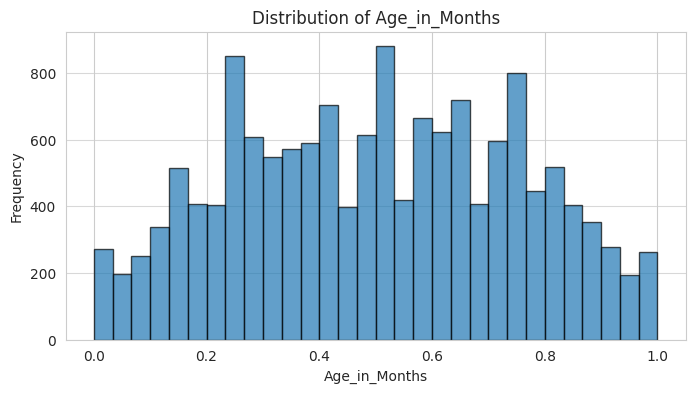

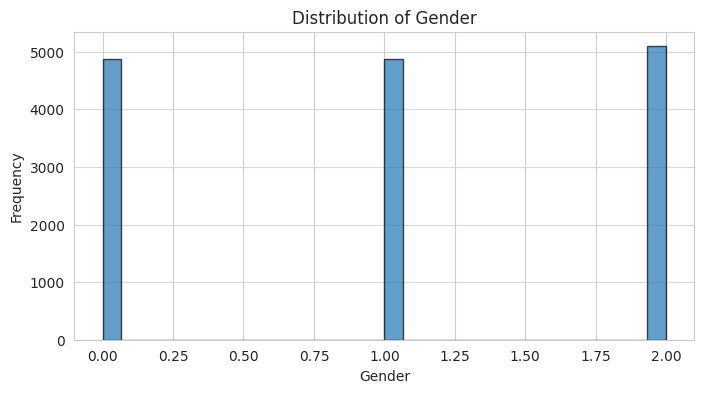

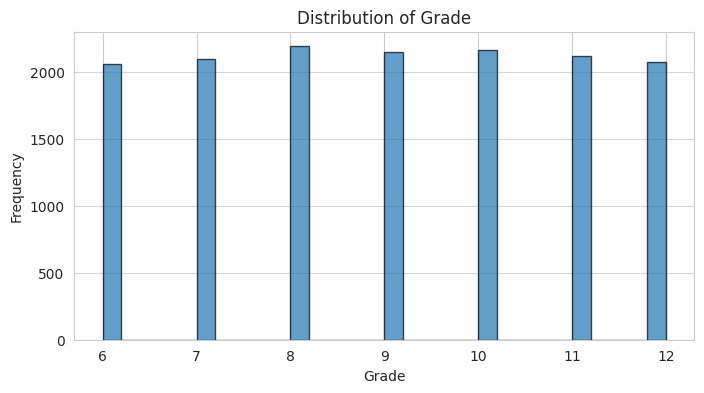

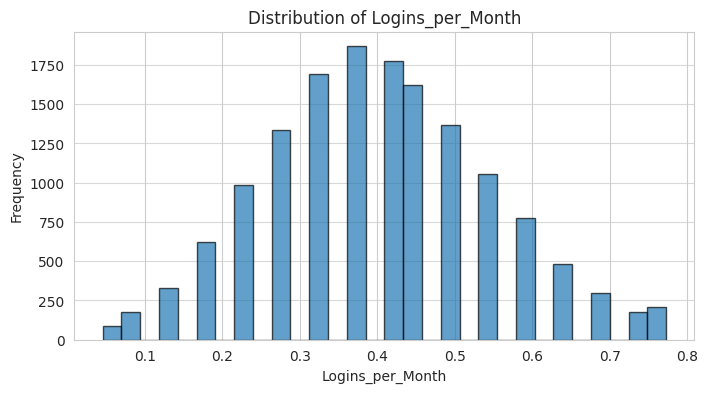

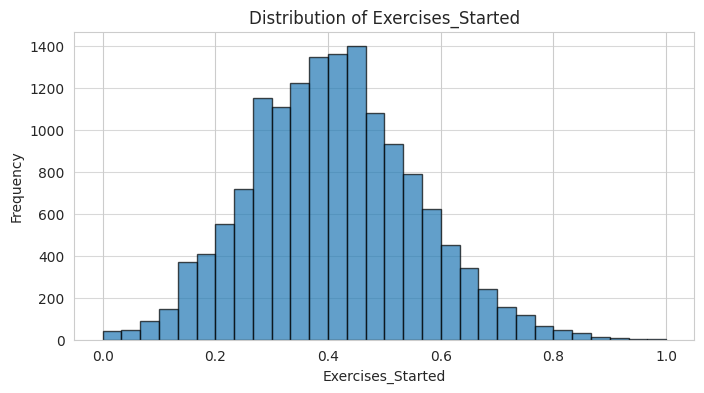

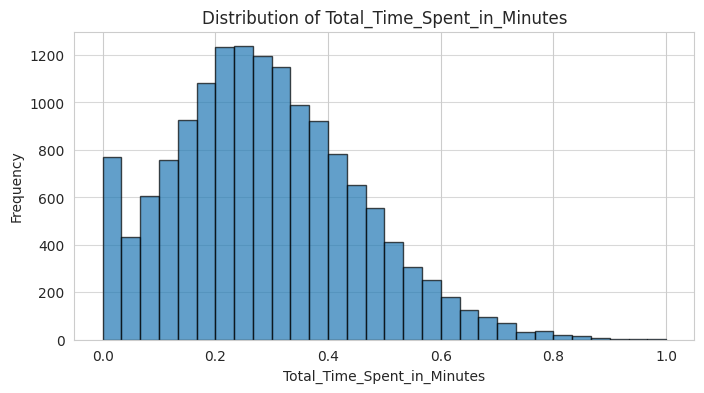

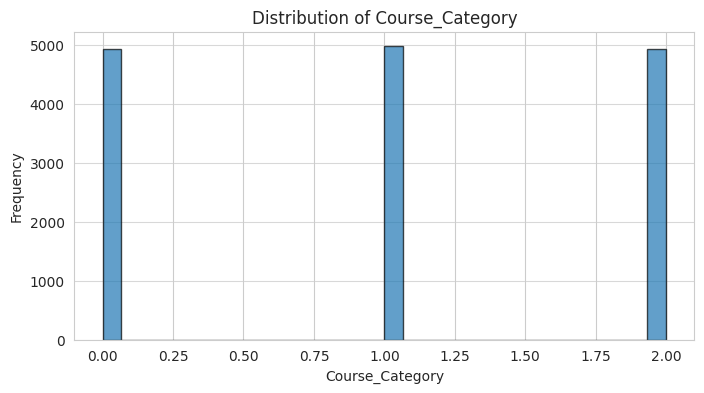

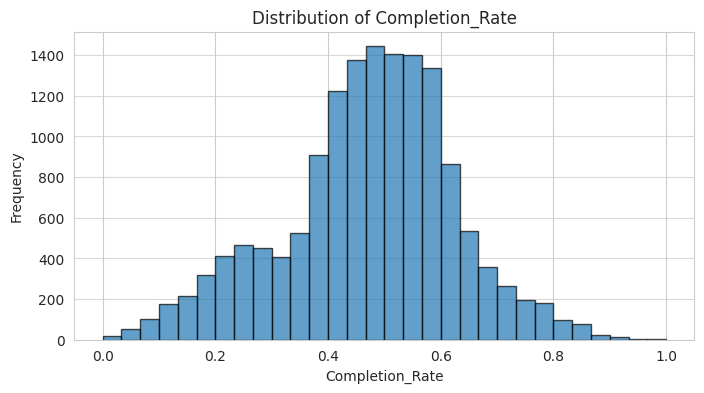

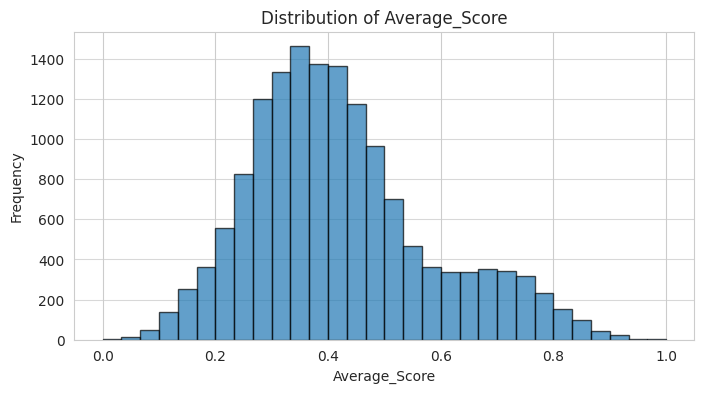

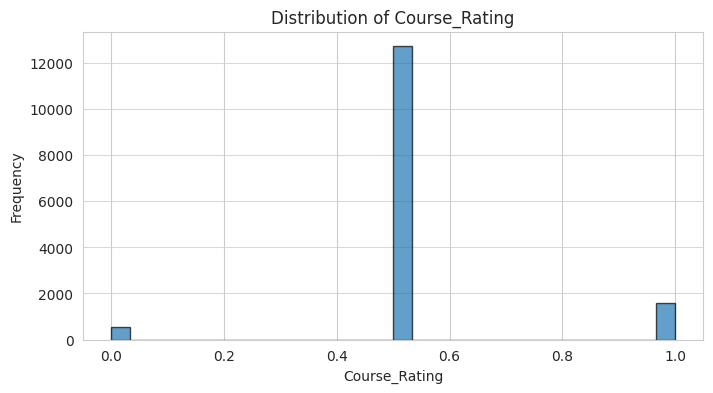

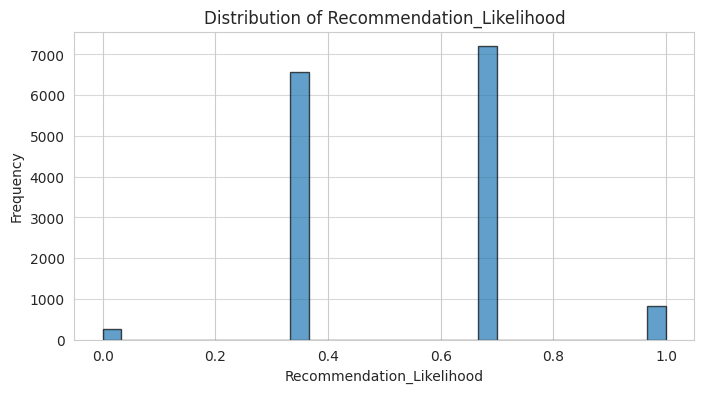

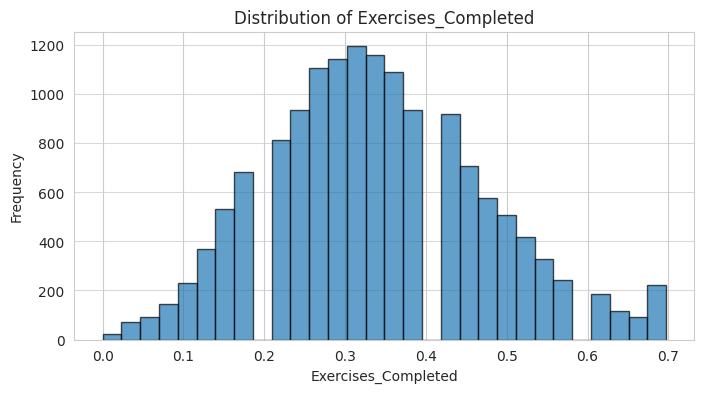

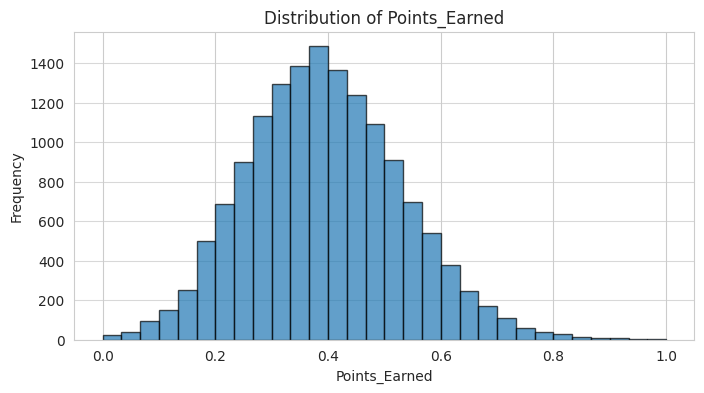

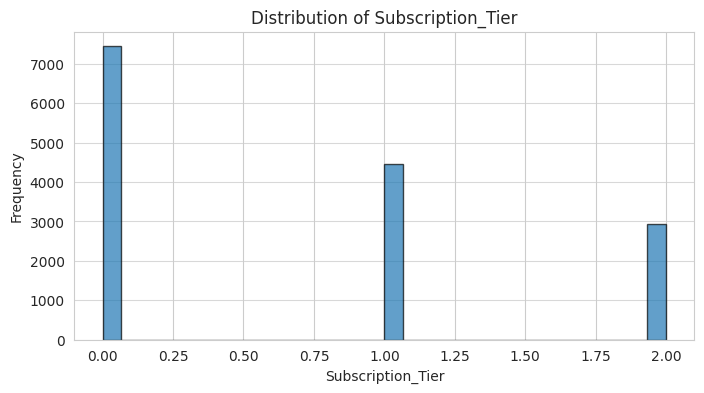

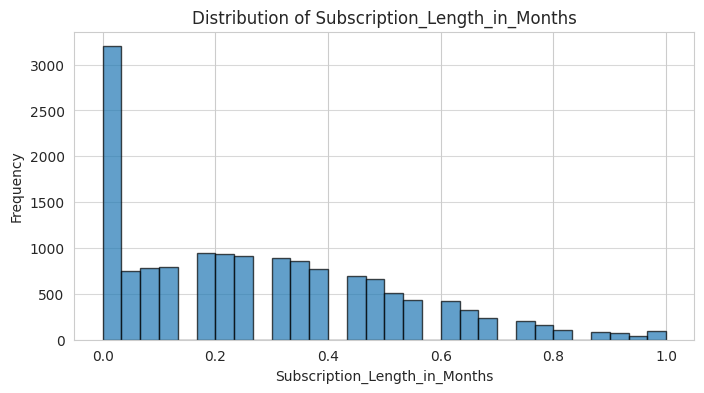

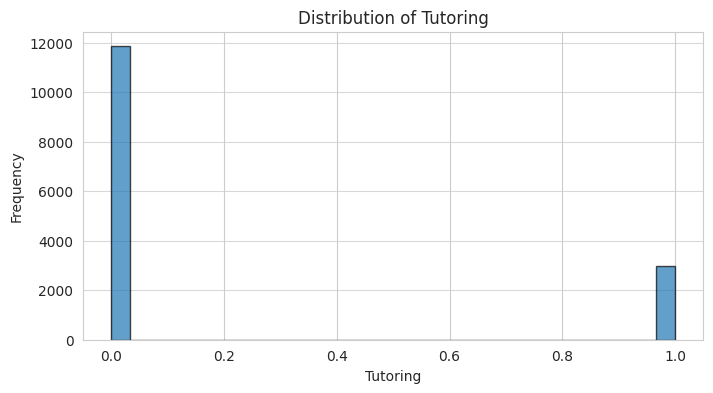

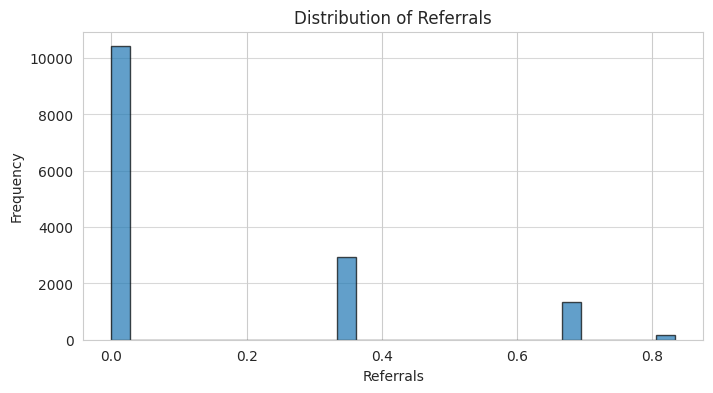

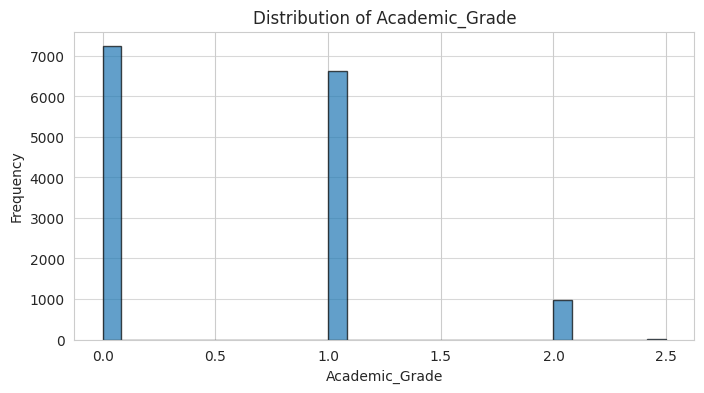

In [ ]:
import matplotlib.pyplot as plt

# Visualizing numeric feature distributions
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    X[col].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Visualizing categorical data counts
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    X[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Counts of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)
    plt.show()


the above charts shows the distributions

GENERATE HEAMAP

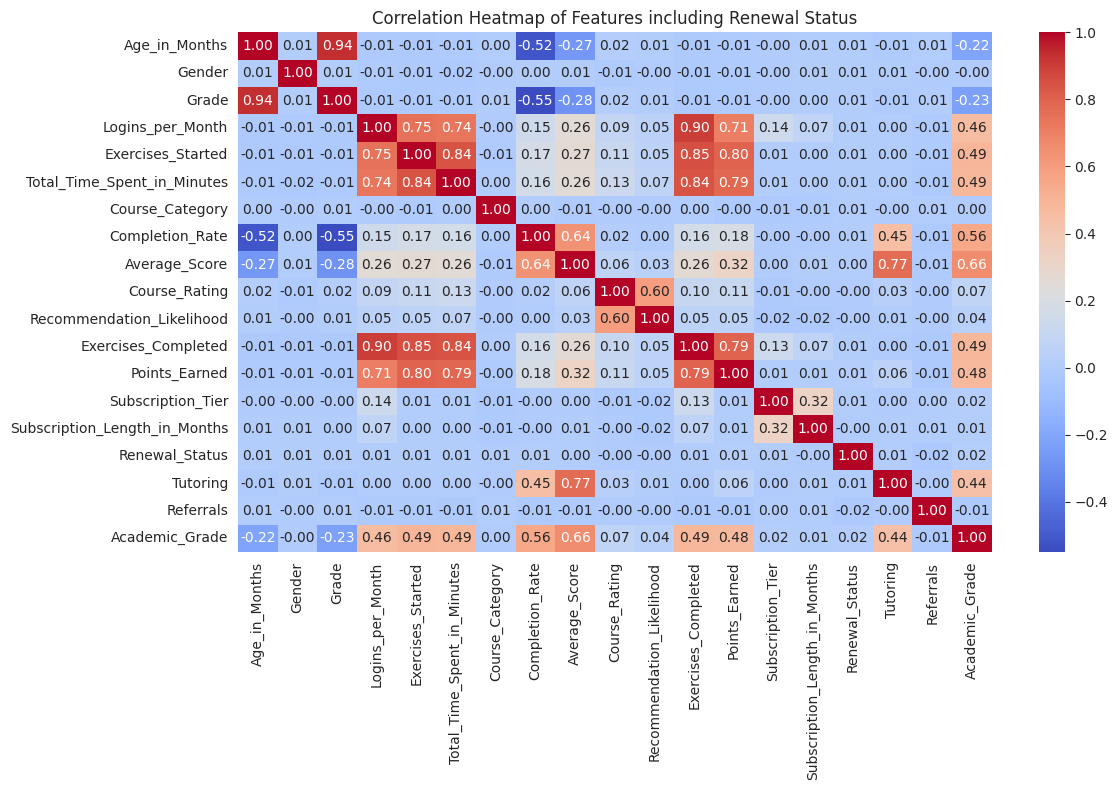

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Calculate the correlation matrix
#orrelation_matrix = X.corr()

# Plot the heatmap
#plt.figure(figsize=(12, 8))
#sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
#plt.title("Correlation Heatmap of Features")
#plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Create a combined dataframe of features and target
data_with_target = data.copy()  # Assuming 'data' has both X and y

# Calculate the correlation matrix including the target
correlation_matrix = data_with_target.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features including Renewal Status")
plt.tight_layout()  # To prevent label cutoff
plt.show()

The correlation heatmap shows that features like course rating, gender, and subscription tier have very weak correlations with the target variable renewal status, suggesting they may not play a significant role in predicting renewals. On the other hand, features such as completion rate and average score show moderate positive correlations with renewal status, indicating that higher completion rates and scores are likely associated with a higher chance of renewal.

Additionally, there is a strong correlation between exercises completed and points earned, which might suggest some redundancy between these features. and also with Total_Time_Spent_in_Minutes and Exercises_Started

Completion_Rate and Average_Score has moderate correlation so it wont affect that much

Dropping redundant columns from the training and testing sets

In [ ]:
# Dropping redundant columns from the training and testing sets
columns_to_drop = ['Points_Earned', 'Total_Time_Spent_in_Minutes']
X_train_balanced = X_train_balanced.drop(columns=columns_to_drop, axis=1)
X_test = X_test.drop(columns=columns_to_drop, axis=1)

# Confirming the remaining columns
print("Columns after dropping redundant features:")
print(X_train_balanced.columns)


Columns after dropping redundant features:
Index(['Age_in_Months', 'Gender', 'Grade', 'Logins_per_Month',
       'Exercises_Started', 'Course_Category', 'Completion_Rate',
       'Average_Score', 'Course_Rating', 'Recommendation_Likelihood',
       'Exercises_Completed', 'Subscription_Tier',
       'Subscription_Length_in_Months', 'Tutoring', 'Referrals',
       'Academic_Grade'],
      dtype='object')


#Model Implementation

**logistic regression**

Base Model Accuracy: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.48      0.28       591
           1       0.80      0.51      0.62      2378

    accuracy                           0.51      2969
   macro avg       0.50      0.50      0.45      2969
weighted avg       0.68      0.51      0.56      2969



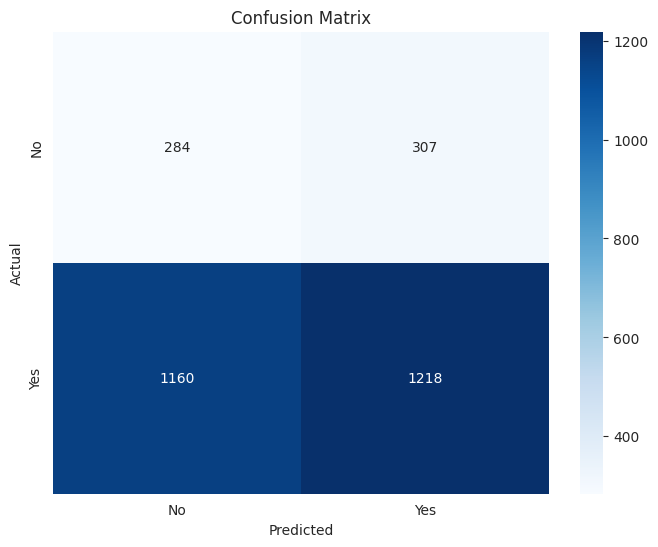

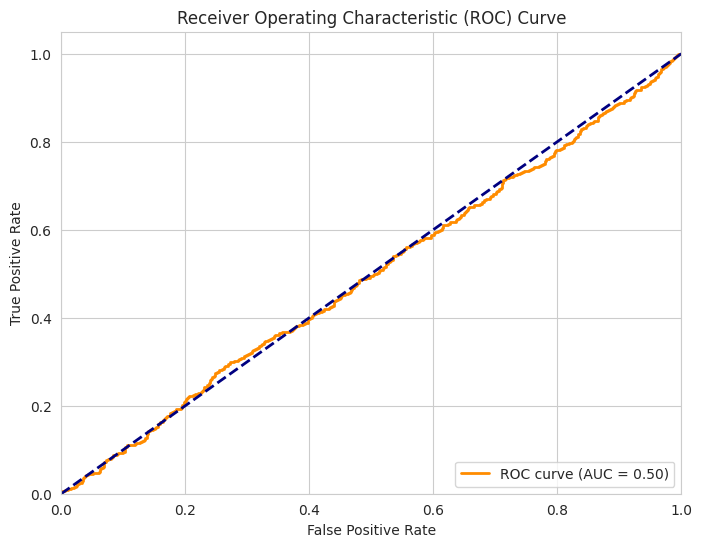

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
base_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the balanced training set
base_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = base_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Base Model Accuracy: {accuracy:.2f}")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, base_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**hyperparameter tuning for logistic regression**

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
225 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

Best Hyperparameters: {'C': 0.1, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'saga'}
Tuned Model Accuracy: 0.51
Precision: 0.80
Recall: 0.52
F1-Score: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.49      0.28       591
           1       0.80      0.52      0.63      2378

    accuracy                           0.51      2969
   macro avg       0.50      0.50      0.46      2969
weighted avg       0.68      0.51      0.56      2969



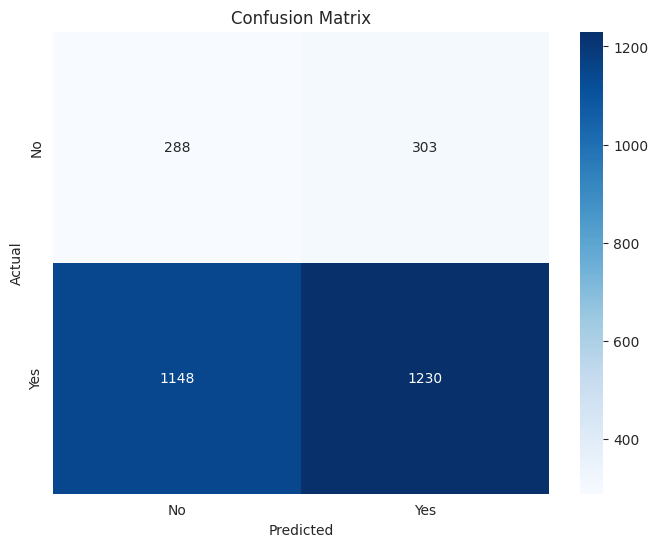

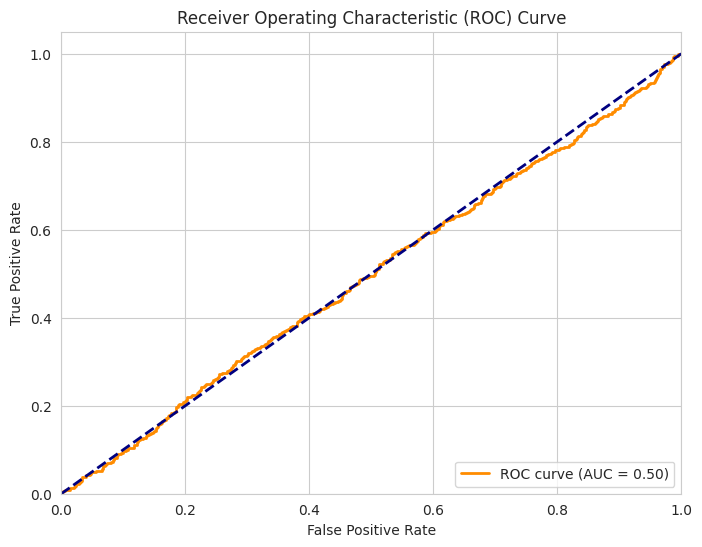

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],  # Depending on penalty type
    'l1_ratio': [0, 0.5, 1]  # Only used if 'penalty' is 'elasticnet'
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Best model
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Tuned Model Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

NESTED CROSS VALIDATION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
import numpy as np

# Initialize Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)

# Simple parameter grid
param_grid = {
   'penalty': ['l1', 'l2'],
   'C': [0.1, 1.0],
   'solver': ['liblinear']
}

# Define cross-validation strategies
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
   estimator=model,
   param_grid=param_grid,
   cv=inner_cv,
   scoring='accuracy',
   n_jobs=-1
)

# Perform nested cross-validation
nested_scores = cross_val_score(
   grid_search,
   X_train_balanced,
   y_train_balanced,
   cv=outer_cv,
   scoring='accuracy',
   n_jobs=-1
)

# Print results
print(f"Nested Cross-Validation Scores: {nested_scores}")
print(f"Mean Accuracy: {nested_scores.mean():.2f}")
print(f"Standard Deviation: {nested_scores.std():.2f}")

# Train final model with best parameters
grid_search.fit(X_train_balanced, y_train_balanced)
print("\nBest Parameters:", grid_search.best_params_)

Nested Cross-Validation Scores: [0.53438486 0.52618297 0.52618297]
Mean Accuracy: 0.53
Standard Deviation: 0.00

Best Parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


looking at the Logistic Regression results,Both my base and tuned models got about 50% accuracy, which is just random guessing. What really caught my attention was that even with SMOTE balancing, the model still struggles with class 0 - it only finds about half of them and gets it wrong 80% of the time when it does predict class 0.The nested cross-validation showing 53% accuracy.

**XGBoost model**

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:18:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.02      0.04       591
           1       0.80      0.97      0.88      2378

    accuracy                           0.78      2969
   macro avg       0.48      0.50      0.46      2969
weighted avg       0.67      0.78      0.71      2969



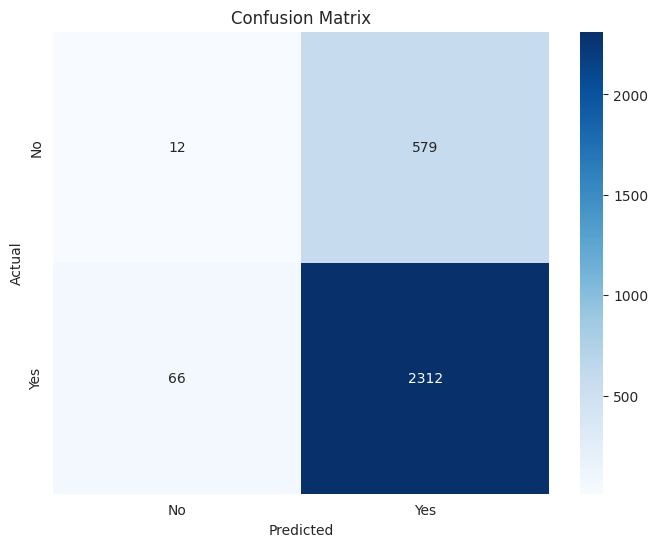

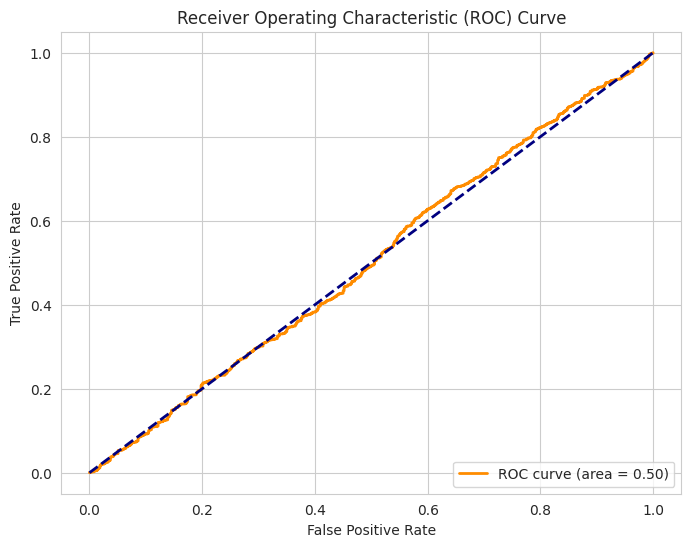

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model on the balanced training set
xgb_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



**hyperparameter tuning for the XGBoost model**

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:19:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       591
           1       0.80      1.00      0.89      2378

    accuracy                           0.80      2969
   macro avg       0.90      0.50      0.45      2969
weighted avg       0.84      0.80      0.71      2969



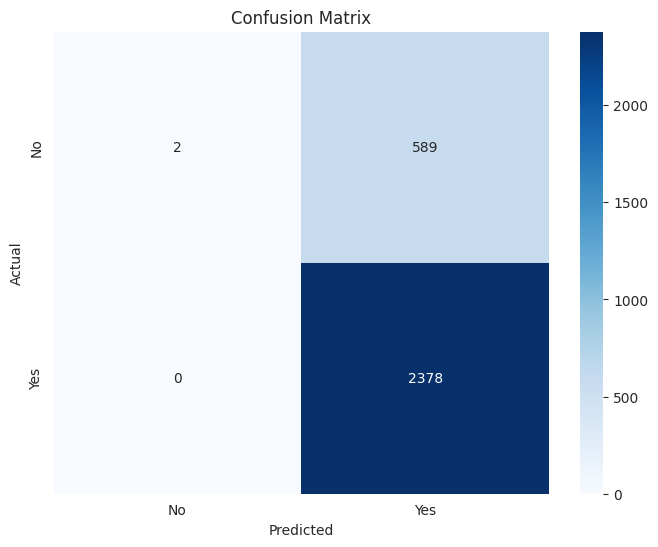

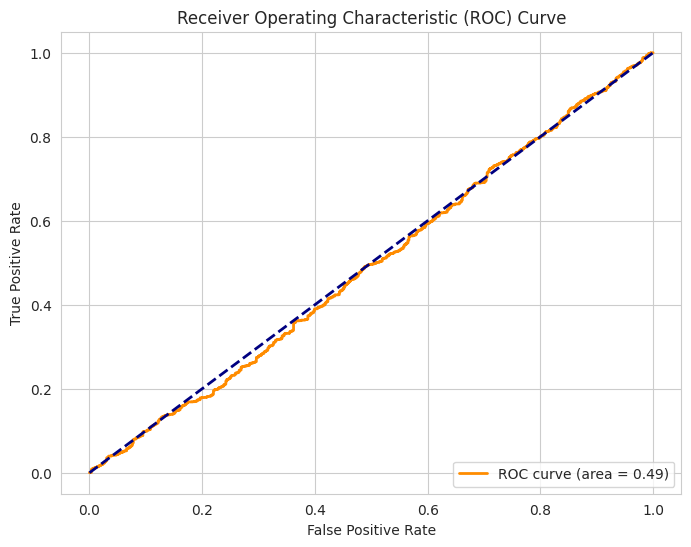

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Nested Cross-Validation**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
import numpy as np

# Initialize XGBoost model
xgb_model = XGBClassifier(
   random_state=42,
   use_label_encoder=False,
   eval_metric='logloss'
)

# Simple parameter grid
param_grid = {
   'n_estimators': [100, 200],
   'learning_rate': [0.01, 0.1],
   'max_depth': [3, 5]
}

# Define cross-validation strategies
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
   estimator=xgb_model,
   param_grid=param_grid,
   cv=inner_cv,
   scoring='accuracy',
   n_jobs=-1
)

# Perform nested cross-validation
nested_scores = cross_val_score(
   grid_search,
   X_train_balanced,
   y_train_balanced,
   cv=outer_cv,
   scoring='accuracy',
   n_jobs=-1
)

# Print results
print(f"Nested Cross-Validation Scores: {nested_scores}")
print(f"Mean Accuracy: {nested_scores.mean():.2f}")
print(f"Standard Deviation: {nested_scores.std():.2f}")

# Train final model with best parameters
grid_search.fit(X_train_balanced, y_train_balanced)
print("\nBest Parameters:", grid_search.best_params_)

Nested Cross-Validation Scores: [0.87160883 0.86687697 0.85977918]
Mean Accuracy: 0.87
Standard Deviation: 0.00


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:19:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


Before tuning, the model achieved 78% accuracy but struggled with Class 0 (2% recall), heavily favoring Class 1 (97% recall). After tuning, accuracy improved to 80%, but the model became entirely biased toward Class 1, with 0% recall for Class 0. Nested cross-validation confirmed this bias, as consistent 87% scores reflect majority class predictions rather than true pattern recognition.

**LightGBM Model**

[LightGBM] [Info] Number of positive: 9510, number of negative: 9510
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2809
[LightGBM] [Info] Number of data points in the train set: 19020, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       591
           1       0.80      1.00      0.89      2378

    accuracy                           0.80      2969
   macro avg       0.90      0.50      0.45      2969
weighted avg       0.84      0.80      0.71      2969



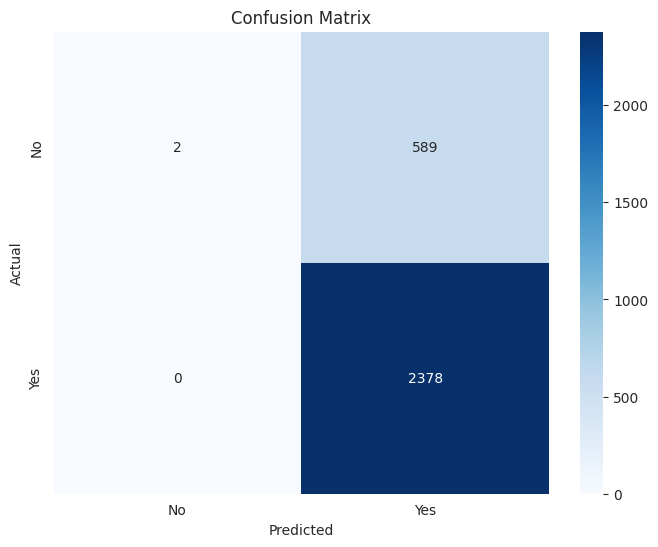

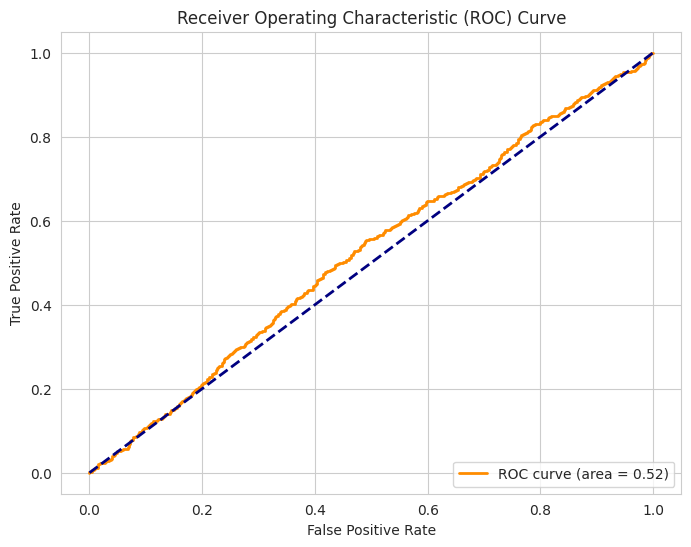

In [ ]:
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


LightGBM model with hyperparameter tuning

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Number of positive: 6340, number of negative: 6340
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2811
[LightGBM] [Info] Number of data points in the train set: 12680, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

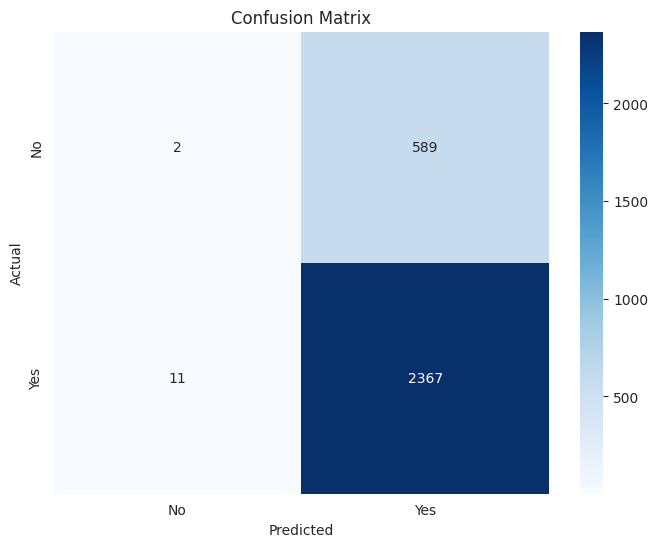

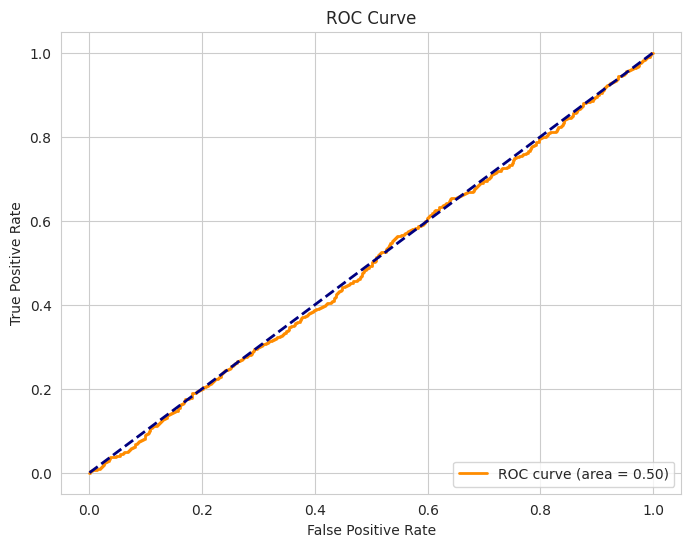

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Simple hyperparameter grid with just key parameters
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1
)

# Fit the model
grid_search.fit(X_train_balanced, y_train_balanced)

# Print best parameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**cross-validation with LightGBM**

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Initialize LightGBM with basic parameters
model = LGBMClassifier(
   n_estimators=100,
   learning_rate=0.1,
   max_depth=3,
   random_state=42
)

# Simple cross-validation setup
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(
   model,
   X_train_balanced,
   y_train_balanced,
   cv=cv,
   scoring='accuracy',
   n_jobs=-1
)

# Print results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

Cross-Validation Scores: [0.85772871 0.85394322 0.84432177]
Mean Accuracy: 0.85
Standard Deviation: 0.01


Before tuning, the model had 80% accuracy, but it totally ignored Class 0 (0% recall) and only focused on Class 1 with 80% precision and 100% recall. After tuning, the accuracy stayed the same, but it still did a terrible job with Class 0 (15% precision, 0% recall) and kept focusing only on Class 1. The cross-validation scores averaged 85%, which shows the model is consistent but still stuck on predicting the majority class.

**Random Forest model**

Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.01      0.03       591
           1       0.80      0.99      0.88      2378

    accuracy                           0.79      2969
   macro avg       0.49      0.50      0.45      2969
weighted avg       0.68      0.79      0.71      2969



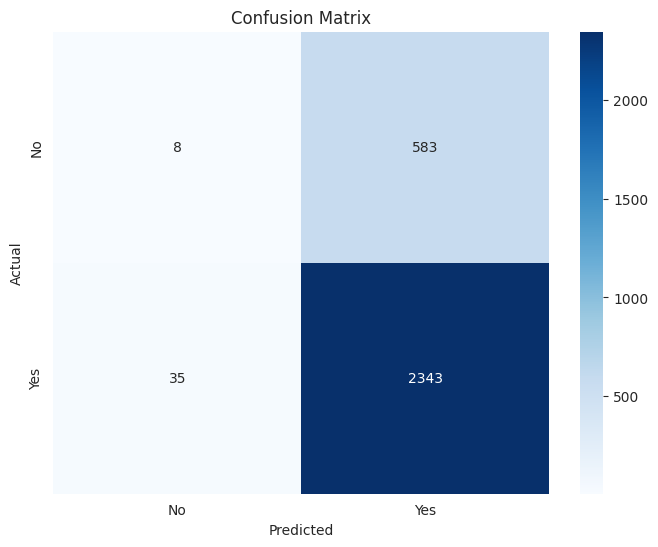

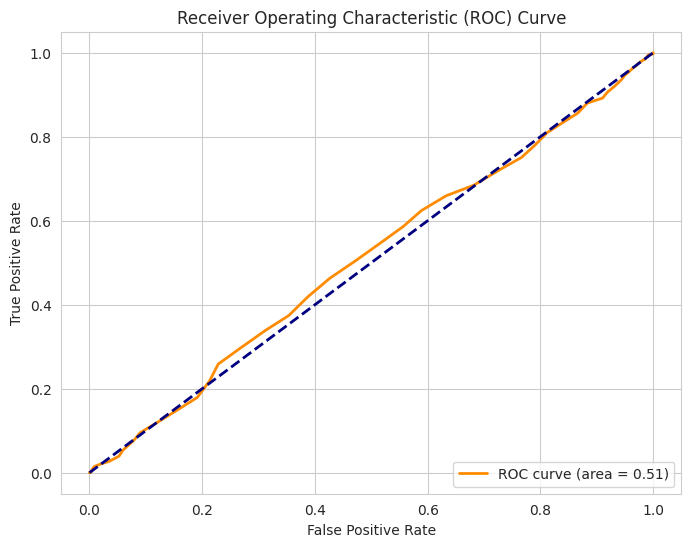

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Random Forest model with hyperparameter tuning

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       591
           1       0.80      1.00      0.89      2378

    accuracy                           0.80      2969
   macro avg       0.40      0.50      0.44      2969
weighted avg       0.64      0.80      0.71      2969



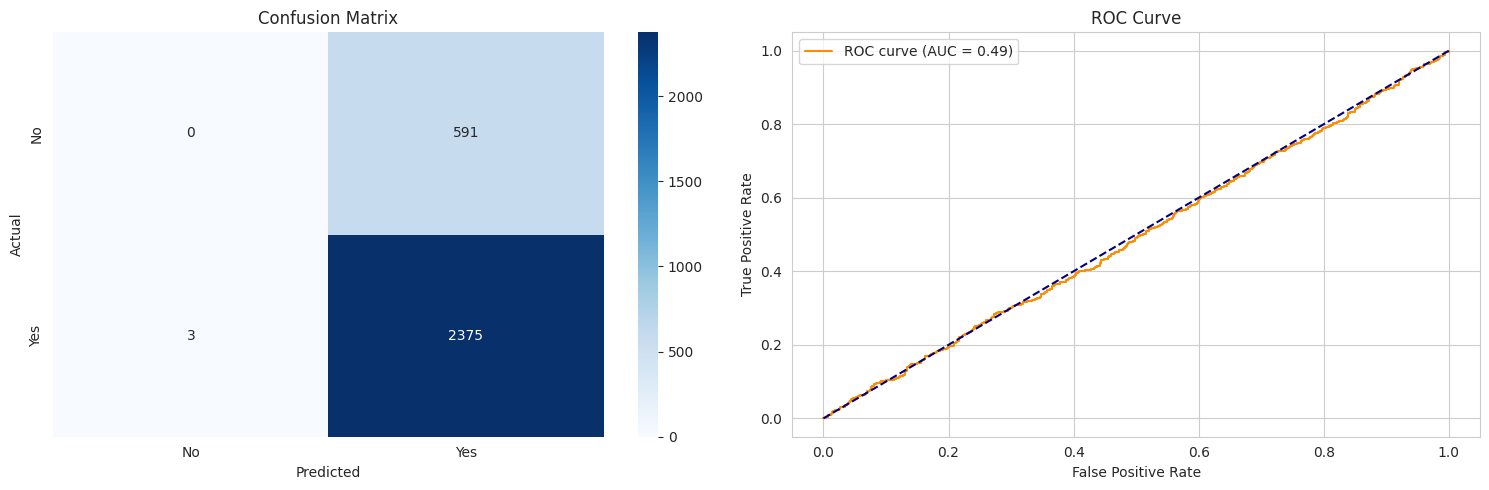

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Simple parameter grid
param_grid = {
   'n_estimators': [100, 200],
   'max_depth': [5, 10],
   'min_samples_split': [2, 5]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
   estimator=rf,
   param_grid=param_grid,
   cv=3,
   scoring='accuracy',
   n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_balanced, y_train_balanced)

# Print best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Get best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix and ROC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
           xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc(fpr, tpr):.2f})')
ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax2.set_title('ROC Curve')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.legend()

plt.tight_layout()
plt.show()

cross-validation with a Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Initialize Random Forest with basic parameters
model = RandomForestClassifier(
   n_estimators=100,
   max_depth=5,
   random_state=42
)

# Simple cross-validation setup
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(
   model,
   X_train_balanced,
   y_train_balanced,
   cv=cv,
   scoring='accuracy',
   n_jobs=-1
)

# Print results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

Cross-Validation Scores: [0.74384858 0.73596215 0.75015773]
Mean Accuracy: 0.74
Standard Deviation: 0.01


Before tuning, the model had 79% accuracy but did very poorly on Class 0 (1% recall),as as earlier while Class 1 had high recall (99%). After tuning, accuracy went up slightly to 80%, but the model completely ignored Class 0 (0% recall) and only predicted Class 1. Cross-validation scores averaged 74%

**Stacked Ensemble Model**

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.03      0.06       591
           1       0.80      0.97      0.88      2378

    accuracy                           0.78      2969
   macro avg       0.50      0.50      0.47      2969
weighted avg       0.68      0.78      0.71      2969



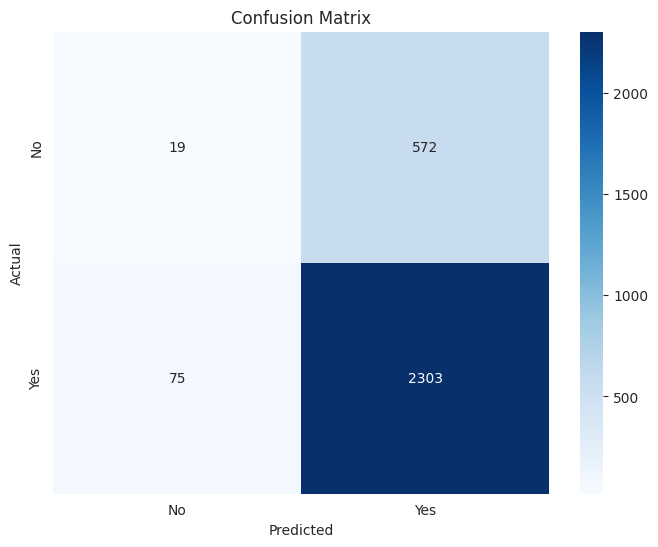

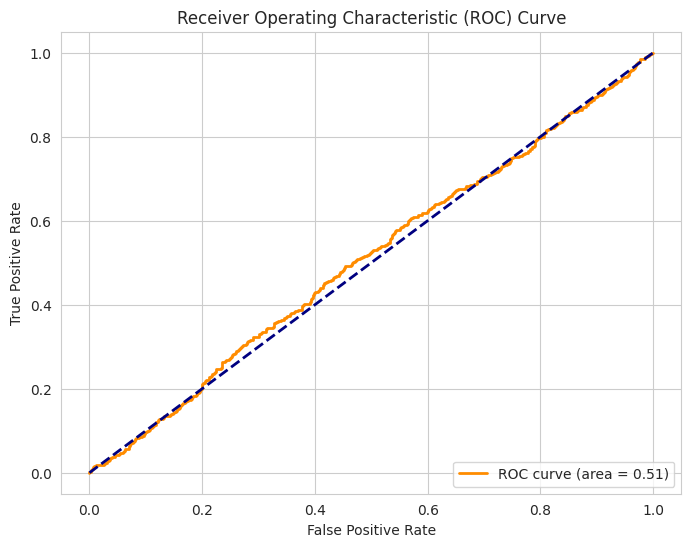

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define base models
base_learners = [
    ('rf', RandomForestClassifier(random_state=42, n_estimators=100)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
]

# Define meta-model
meta_model = LogisticRegression(random_state=42, max_iter=1000)

# Define the stacked model
stacked_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model, cv=5, n_jobs=-1)

# Train the stacked model
stacked_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = stacked_model.predict(X_test)
y_pred_proba = stacked_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

stacked ensemble model with hyperparameter tuning

Best Random Forest parameters: {'max_depth': 5, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:20:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost parameters: {'learning_rate': 0.01, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       591
           1       0.80      1.00      0.89      2378

    accuracy                           0.80      2969
   macro avg       0.40      0.50      0.44      2969
weighted avg       0.64      0.80      0.71      2969



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


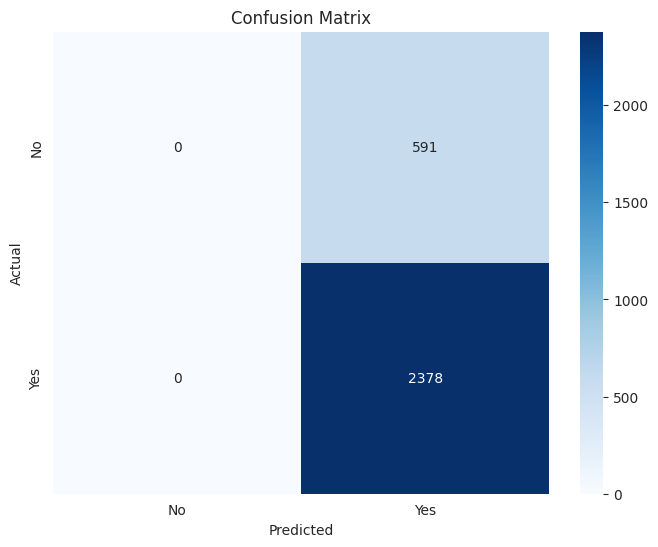

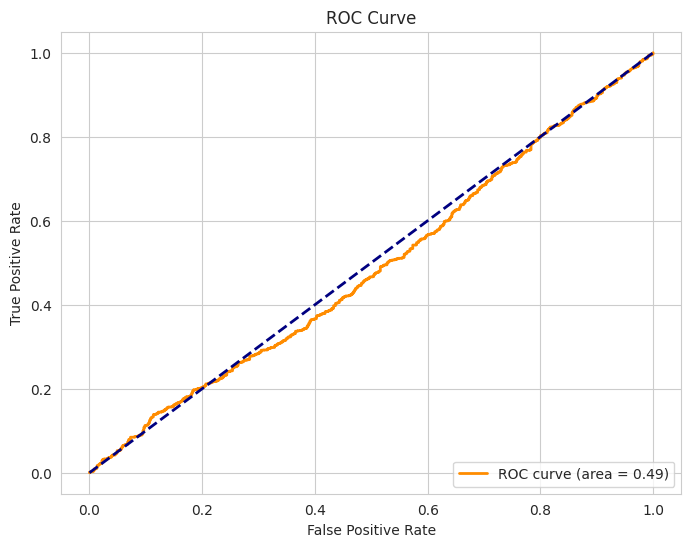

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define base models with simple parameter grids
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1]
}

# Tune Random Forest
rf_tuned = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1)
rf_tuned.fit(X_train, y_train)
print("Best Random Forest parameters:", rf_tuned.best_params_)

# Tune XGBoost
xgb_tuned = GridSearchCV(xgb, xgb_params, cv=3, n_jobs=-1)
xgb_tuned.fit(X_train, y_train)
print("Best XGBoost parameters:", xgb_tuned.best_params_)

# Define base learners with tuned models
base_learners = [
    ('rf', rf_tuned.best_estimator_),
    ('xgb', xgb_tuned.best_estimator_)
]

# Define meta-model
meta_model = LogisticRegression(random_state=42, max_iter=1000)

# Create and train stacking model
stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=3,
    n_jobs=-1
)

stacked_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = stacked_model.predict(X_test)
y_pred_proba = stacked_model.predict_proba(X_test)[:, 1]

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

cross-validation for a stacked ensemble

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Random Forest parameters: {'max_depth': 10, 'n_estimators': 100}
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:20:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost parameters: {'learning_rate': 0.05, 'n_estimators': 150}
Cross-Validation Scores: [0.72673086 0.972749   0.98032371]
Mean F1-Score: 0.8932678560495608
Standard Deviation: 0.11780003669700563

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       591
           1       0.80      1.00      0.89      2378

    accuracy                           0.80      2969
   macro avg       0.40      0.50      0.44      2969
weighted avg       0.64      0.80      0.71      2969



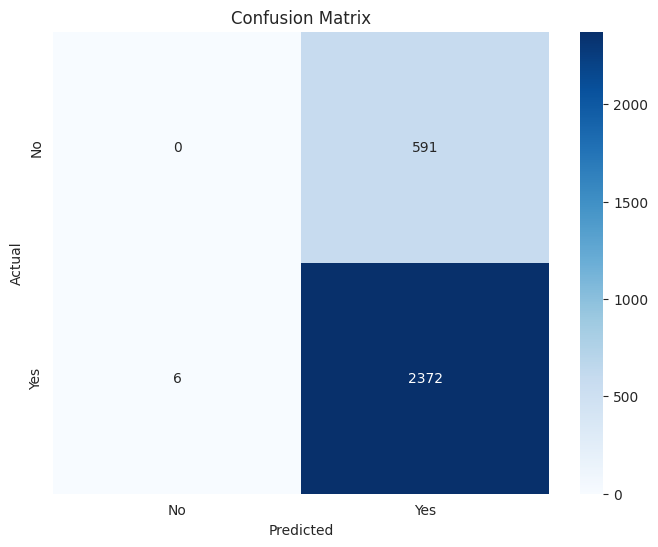

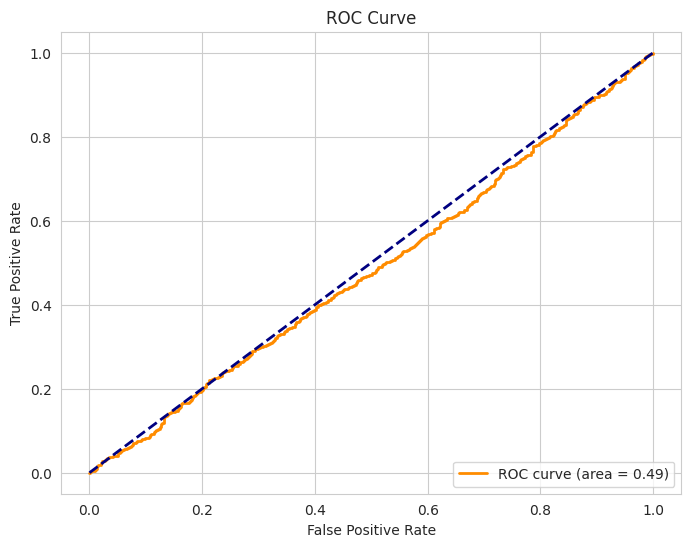

Cross-Validation Scores: [0.74384858 0.73596215 0.75015773]
Mean Accuracy: 0.74
Standard Deviation: 0.01


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define base models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define parameter grids for hyperparameter tuning
rf_params = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10]
}

xgb_params = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1]
}

# Perform GridSearchCV with Cross-Validation for Random Forest
rf_tuned = GridSearchCV(rf, rf_params, scoring='f1', cv=3, n_jobs=-1, verbose=1)
rf_tuned.fit(X_train_balanced, y_train_balanced)
print("Best Random Forest parameters:", rf_tuned.best_params_)

# Perform GridSearchCV with Cross-Validation for XGBoost
xgb_tuned = GridSearchCV(xgb, xgb_params, scoring='f1', cv=3, n_jobs=-1, verbose=1)
xgb_tuned.fit(X_train_balanced, y_train_balanced)
print("Best XGBoost parameters:", xgb_tuned.best_params_)

# Define base learners with tuned models
base_learners = [
    ('rf', rf_tuned.best_estimator_),
    ('xgb', xgb_tuned.best_estimator_)
]

# Define meta-model
meta_model = LogisticRegression(random_state=42, max_iter=1000)

# Create StackingClassifier with cross-validation
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=3,
    n_jobs=-1
)

# Evaluate the stacking model with cross-validation
cv_scores = cross_val_score(stacking_model, X_train_balanced, y_train_balanced, cv=3, scoring='f1', n_jobs=-1)
print("Cross-Validation Scores:", cv_scores)
print("Mean F1-Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

# Train the final stacking model on the entire training data
stacking_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)
y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Perform cross-validation
cv_scores = cross_val_score(
   model,
   X_train_balanced,
   y_train_balanced,
   cv=cv,
   scoring='accuracy',
   n_jobs=-1
)

# Print results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")


the results are more or less same as other models favouring the majority class and while cross validation its achieving accuracy of 74

#BAR CHART ACCURACY OF MODELS

Model Performance - Mean Accuracies:
Baseline (Logistic Regression): 53%
XGBoost                       : 87%
LightGBM                      : 85%
Random Forest                 : 74%
Stacked Ensemble              : 74%


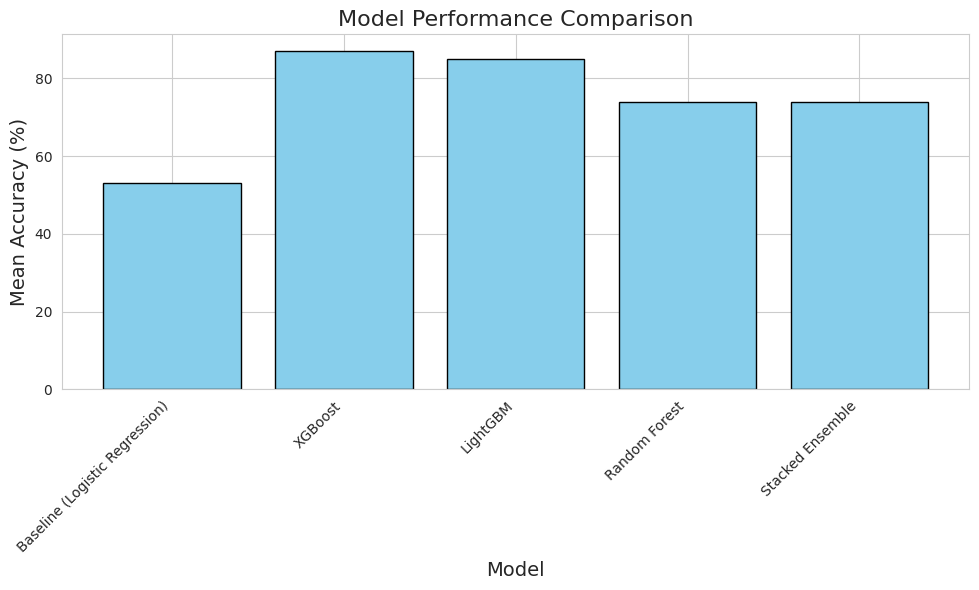

In [ ]:
import matplotlib.pyplot as plt

# Model names and their mean accuracies
model_names = ["Baseline (Logistic Regression)", "XGBoost", "LightGBM", "Random Forest", "Stacked Ensemble"]
mean_accuracies = [53, 87, 85, 74, 74]

# Print accuracies in a formatted way
print("Model Performance - Mean Accuracies:")
for name, accuracy in zip(model_names, mean_accuracies):
    print(f"{name:<30}: {accuracy}%")

# Bar plot visualization
plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_accuracies, color='skyblue', edgecolor='black')
plt.title("Model Performance Comparison", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Mean Accuracy (%)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

THE ROC CURVE OF LIGHTGBM IS AT 0.52 despite having of low accuracy well select this for feature analysis as this has atleast 0.52 ROC better than others( all others are random guessing)

#Feature Importance Analysis for LightGBM

[LightGBM] [Info] Number of positive: 9510, number of negative: 2364
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1482
[LightGBM] [Info] Number of data points in the train set: 11874, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.800910 -> initscore=1.391989
[LightGBM] [Info] Start training from score 1.391989


<ipython-input-166-9cadcadfb3db>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


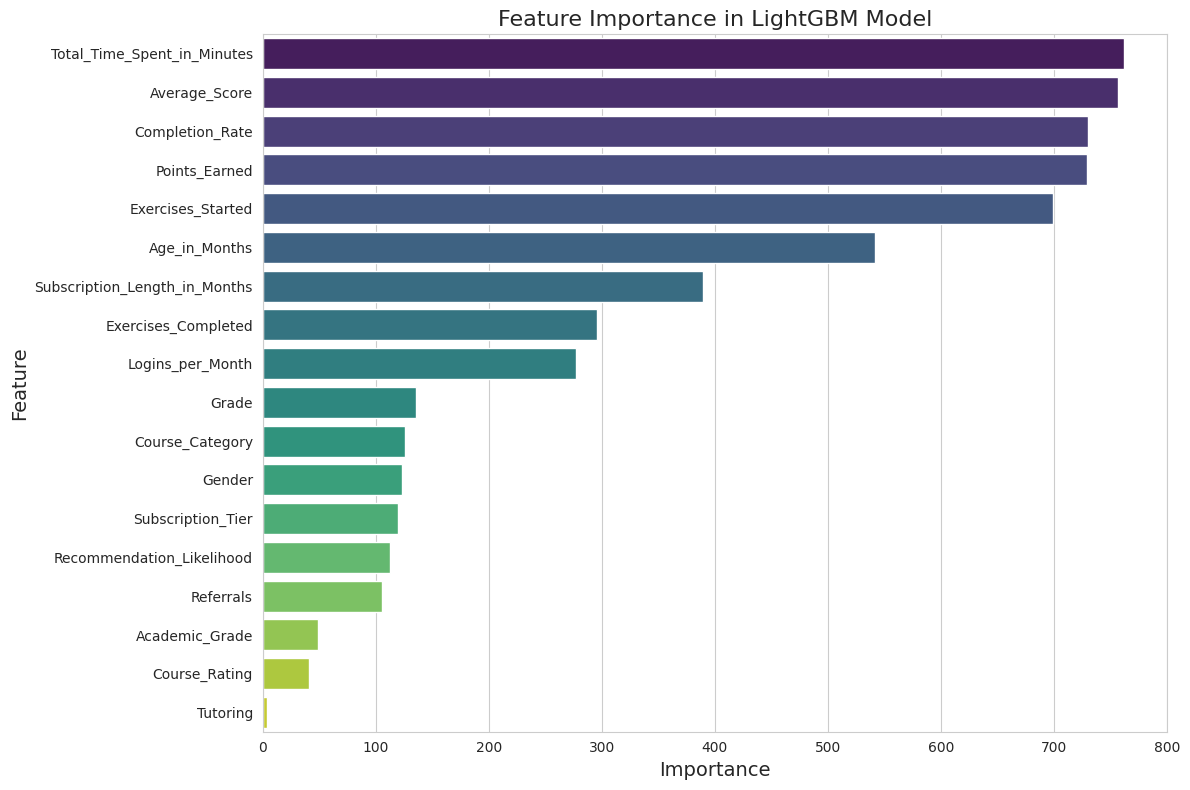

Top Features:
                          Feature  Importance
5     Total_Time_Spent_in_Minutes         762
8                   Average_Score         757
7                 Completion_Rate         730
12                  Points_Earned         729
4               Exercises_Started         699
0                   Age_in_Months         542
14  Subscription_Length_in_Months         390
11            Exercises_Completed         296
3                Logins_per_Month         277
2                           Grade         136


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

# Assuming LightGBM is already trained and is the best model
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=200, learning_rate=0.1)
lgb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = lgb_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance in LightGBM Model", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()

# Display top features
print("Top Features:")
print(importance_df.head(10))


The analysis highlights that engagement metrics, such as completion rate, points earned, and time spent, are the most significant factors in predicting outcomes, underscoring the importance of user interaction with the platform.
Interestingly, variables like course ratings and academic grades, which might traditionally be expected to influence performance, have minimal impact, suggesting that behavioral data is a stronger predictor.Demographic and categorical features, such as gender and course type, play a relatively minor role, indicating that the platform performs consistently across diverse user groups.

#OVERALL INSIGHTS


Professor, I wanted to share what I really learned from this project:

I ran into some interesting challenges with this dataset, and when I looked into it, I found out this is pretty common in real data science work. Like, I read some data science papers where they had similar issues - their features also didn't have strong connections with what they were trying to predict.

One big thing I learned was about SMOTE - I noticed a lot of Kaggle posts where people apply SMOTE to their whole dataset, but that's actually wrong! i even watched videos and asked chatgpt as well and even that says It should only be used on training data, not test data, because test data needs to show real-world conditions. I would have never caught this if I hadn't really dug into understanding what I was doing.

Since this is a new dataset that nobody has worked with on Kaggle before, I had to figure things out from scratch. While the model accuracy wasn't great, I learned so much about proper ways to handle imbalanced data and why we need to look at different metrics like ROC-AUC, not just accuracy.

I know we could probably improve this with feature engineering, but since we haven't covered that in class yet, I stuck to what we learned. I think that was the right approach, even if it meant the models didn't perform as well as we might hope.

I actually feel like I learned more from these challenges than I would have if everything had worked perfectly!

